# **Taller 2: Carga y Análisis Exploratorio de Datos.**

**Curso: 09481 - Inteligencia Artificial.**

**Universidad Icesi.**

**Profesor: Breyner Posso.**

**Estudiantes: Daniela Olarte y Duvan Cuero**

# Accediendo a archivos de Google Drive, Google Colab, y de su máquina local.

¿Cómo acceder a los archivos desde Google Drive? 

In [1]:
#Al ejecutar esta celda, Google colab lo va a llevar a su cuenta de google, 
#y le va a pedir que copie y pegue un código un código de acceso en un recuadro.

from google.colab import drive
drive.mount('/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#Este código va a crear un archivo de texto denominado "archivo_prueba.txt" en la raíz de 
#su google drive. El archivo tiene la cadena de caracteres 'Archivo de prueba en Google Drive.'. 

with open('/gdrive/My Drive/archivo_prueba.txt', 'w') as f:
  f.write('Archivo de prueba para verificar que la conexión con Google Drive fue exitosa.')
!cat '/gdrive/My Drive/archivo_prueba.txt'

Archivo de prueba para verificar que la conexión con Google Drive fue exitosa.

¿Cómo subir archivos desde su máquina local a Google Colab?

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('El usuario cargó el archivo "{name}" que tiene un tamaño de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

¿Cómo descargar archivos de google Colab a su máquina local?

In [ ]:
from google.colab import files

with open('archivo_de_prueba_2.txt', 'w') as f:
  f.write('Este es un archivo de prueba.')

files.download('archivo_de_prueba_2.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Para mayor información, consulte: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=p2E4EKhCWEC5

# **0. Importar librerias.**

In [2]:
#Vamos a importar las librerías que vamos a utilizar.

import pandas as pd                #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos.      #Esta librería nos sirve para cargar archivos desde el disco duro.


# **1. Cargar un conjunto de datos tabulares.**

In [3]:
#Primero vamos a descargar el archivo "auto-mpg.csv" en nuestra máquina local desde Moodle o desde esta ruta: https://www.kaggle.com/uciml/autompg-dataset

#Ahora cargamos el archivo que tiene el conjunto de datos "auto-mpg.csv"
uploaded = files.upload()

NameError: name 'files' is not defined

In [3]:
#Vamos a utilizar el dataset auto-mpg (https://www.kaggle.com/datasets/uciml/autompg-dataset)
# Vamos a leer el conjunto de datos en un dataframe de pandas.
df = pd.read_csv('auto-mpg.csv',    #Ruta completa a la ubicación del archivo de interés.  
                 na_values='?')              #Como el archivo contiene algunos caracteres ?, con este comando pandas los interpreta como nan (not a number).


In [4]:
#Vamos a utilizar el dataset auto-mpg (https://www.kaggle.com/datasets/uciml/autompg-dataset)
# Vamos a leer el conjunto de datos en un dataframe de pandas.
df = pd.read_csv('/gdrive/MyDrive/Colab_Notebooks/IA1/Datasets/auto-mpg.csv',    #Ruta completa a la ubicación del archivo de interés.  
                 na_values='?')              #Como el archivo contiene algunos caracteres ?, con este comando pandas los interpreta como nan (not a number).


FileNotFoundError: [Errno 2] No such file or directory: '/gdrive/MyDrive/Colab_Notebooks/IA1/Datasets/auto-mpg.csv'

# **2. Análisis Exploratorio de los Datos.**

#### **Pregunta 2.1**

Muestre el número de observaciones y el número de atributos en el dataset

print('Número de observaciones:' , n_obs)

print('Número de atributos: ', n_atr)

In [5]:
#Respuesta pregunta 2.1  

df = pd.read_csv('auto-mpg.csv')   
n_obs = df.shape[0]
n_atr = df.shape[1]


print('Número de observaciones:' , n_obs)
print('Número de atributos: ', n_atr)


Número de observaciones: 398
Número de atributos:  9


In [6]:
#Vamos a ver la información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### **Pregunta 2.2**
Cambie el tipo dato del atributo car name de object a string

In [15]:
#Respuesta pregunta 2.2

car_name = df.iloc[:,8]   #[filas, columnas]
print('Atributos car name tipo object:\n',car_name,'\n')

df['car name'] = df['car name'].astype('string')
print('Atributos car name tipo string:\n', df.info(), '\n') 




Atributos car name tipo object:
 0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 398, dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 no

In [16]:
#Vamos a ver algunas estadísticas básicas del dataset
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
# Revisemos las primeras filas del dataframe.
df.head()  #Si quiere imprimir n filas, use n como argumento de este método.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
# Revisemos las últimas filas del dataframe.
df.tail()  #Si quiere imprimir n filas, use n como argumento de este método.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


## Manejo básico de Pandas

In [18]:
#Imprimamos todas las observaciones del atributo mpg.
print(df['mpg'],'\n')   #Note que puede seleccionar una columna entera del dataframe usando el nombre de la columna en cuestión.

#Revisemos el tipo de dato de esta selección.
print('Tipo:', type(df),'\n')
print('Tipo:', type(df['mpg']),'\n')  #Es una serie !

#Vamos a extraer las primeros 4 primeras observaciones del atributo mpg como una serie de pandas.
print('Resultado de la selección:\n', df['mpg'].iloc[0:4], sep='')
print('Tipo:', type(df['mpg'].iloc[0:4]),'\n')  #Es una serie !

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64 

Tipo: <class 'pandas.core.frame.DataFrame'> 

Tipo: <class 'pandas.core.series.Series'> 

Resultado de la selección:
0    18.0
1    15.0
2    18.0
3    16.0
Name: mpg, dtype: float64
Tipo: <class 'pandas.core.series.Series'> 



In [19]:
#Imprimamos la primera observación (i.e.: la primera fila) del dataframe.
obs1 = df.iloc[0,:]   #[filas, columnas]
print('Primera observación del conjunto de datos:\n',obs1,'\n')

#Qué tipo tiene esta selección que hice?
print('Tipo de la primera observación del conjunto de datos: ', type(obs1),'\n')  #Es una serie !

#Ahora intentemos extraer la segunda observación (i.e.: índice 1) del atributo horsepower (i.e.: índice 3):
print('La segunda observación del atributo horsepower es ', df.iloc[1,3])   #Nota: iloc sólo acepta índices numéricos.

Primera observación del conjunto de datos:
 mpg                                  18.0
cylinders                               8
displacement                        307.0
horsepower                            130
weight                               3504
acceleration                         12.0
model year                             70
origin                                  1
car name        chevrolet chevelle malibu
Name: 0, dtype: object 

Tipo de la primera observación del conjunto de datos:  <class 'pandas.core.series.Series'> 

La segunda observación del atributo horsepower es  165


In [20]:
# Qué tal si quiero extraer un subconjunto de las observaciones?
df_sub = df.iloc[0:10,:] #Tome las filas de la 0 a la 9, y todos los atributos.
print(df_sub.shape)      #(filas, columnas) = (observaciones, atributos)
print(type(df_sub))
print(df_sub)

(10, 9)
<class 'pandas.core.frame.DataFrame'>
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   
5  15.0          8         429.0        198    4341          10.0          70   
6  14.0          8         454.0        220    4354           9.0          70   
7  14.0          8         440.0        215    4312           8.5          70   
8  14.0          8         455.0        225    4425          10.0          70   
9  15.0          8         390.0        190    3850           8.5          70   

   origin                   car name  
0       1  chevrolet ch

In [21]:
df_sub.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Exploración básica del conjunto de datos tabular.

In [22]:
#Ahora revisemos algunos valores de las series de cada atributo.
atributo_de_interes = df.columns[0]  #Índices de atributos válidos para este conjunto de datos 0...7 (porque el 8 es string)
print('Vamos a explorar el atributo ', atributo_de_interes,'\n')

a = df[atributo_de_interes].values
print('Valores: ', a,'\n')
print('Tipo: ', type(a),'\n')  #Es un ndarray para las variables numéricas, un StringArray para 'car name'.
print('Dimensiones: ', a.shape,'\n')  #Es arreglo de rango 1. Es decir que es un vector, pero no es ni fila ni columna !!!

#Cambio de forma (para las variables númericas) a un vector columna.
b = a.reshape((-1,1)) 
print('Nueva dimensión: ', b.shape,'\n')

# #Cambio de forma (para las variables númericas) a un vector fila.
c = a.reshape((1,-1))  
print('Nueva dimensión: ', c.shape,'\n')

Vamos a explorar el atributo  mpg 

Valores:  [18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.
 12.  13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.
 26.  24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.
 13.  19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.
 27.  13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.
 16.  18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.
 19.  21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.
 21.  19.  15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.
 14.  29.  26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.
 15.  15.  16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.
 23.  20.  23.  24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.
 28.  25.  25.  26.  27.  17.5 16.  15.5 14.

## Visualización exploratoria básica del conjunto de datos tabular.

### Histogramas

Los histogramas pueden ser útiles para identificar visualmente la forma como se distribuyen los valores de un atributo.

In [23]:
atr = 'mpg'

array([[<AxesSubplot:title={'center':'mpg'}>]], dtype=object)

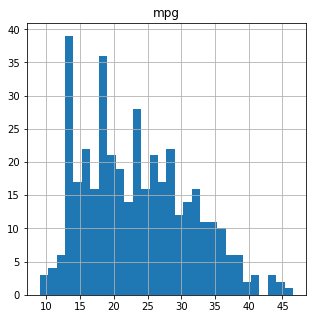

In [24]:
#Generemos algunas gráficas directamente desde pandas.

num_bins = 30 #Número de columnas del histograma
df.hist(column=atr, bins=num_bins, figsize=(5,5))  #Histograma.

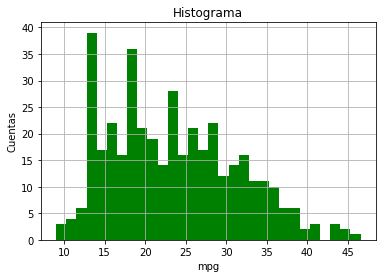

In [25]:
#Ahora generemos el histograma usando la librería matplotlib sobre la cual tenemos un poco más de control en los parámetros de la gráfica.

valores = df[atr].values        #Extraemos el ndarray correspondiente de la columna horsepower.
num_bins = 30                               #Número de divisiones que vamos a usar para el histograma. 
n, bins, patches = plt.hist(valores, num_bins, density=False, facecolor='green')
plt.xlabel(atr)         #Texto en el eje x.
plt.ylabel('Cuentas')                      #Texto en el eje y.
plt.title('Histograma')                     #Título del gráfico. 
plt.grid(True)                              #Activamos la cuadrícula.
plt.show()                                  #Mostramos el gráfico. 

Text(0.5, 1.0, 'Histograma')

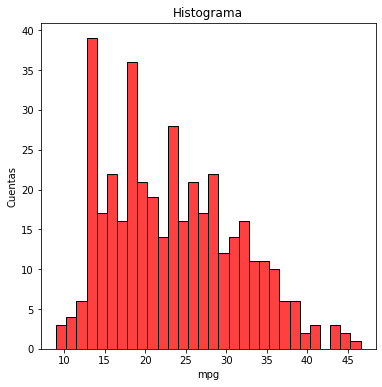

In [26]:
#Ahora generemos el histograma usando la librería seaborn.
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        =atr,
             bins     = 30,
             color    = 'red',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel(atr) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico. 

Text(0.5, 1.0, 'Histograma')

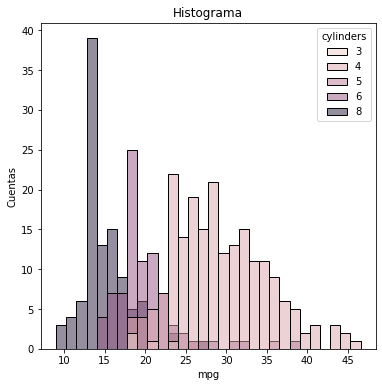

In [27]:
#Qué tal si coloreamos el histograma de acuerdo con el número de cilindros de los vehículos?
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        = atr,
             bins     = 30,
             hue      = 'cylinders',
             fill     = True,
             stat     = 'count')  #'count' muestra el número de observaciones.
                              #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                              #'density' normaliza las cuentas tal que el área del histograma es 1.
                              #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel(atr) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico. 


#### **Pregunta 2.3**
Grafique el histograma del atributo horsepower e indique qué observaciones puede hacer (por ejemplo, ¿es simétrico?, ¿dónde está la mayor concentración de valores?, etc.)

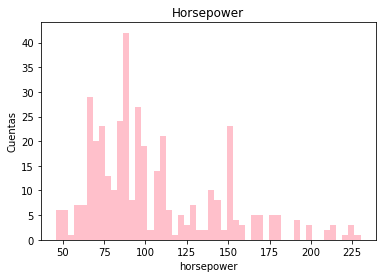

In [12]:
atr2 = 'horsepower'
valores = df[atr2].values        
num_bins = 50                                
n, bins, patches = plt.hist(valores, num_bins, density=False, facecolor='pink')
plt.xlabel(atr2)        
plt.ylabel('Cuentas')                     
plt.title('Horsepower')                     
plt.grid(False)                              
plt.show() 

- El histograma no es simétrico
- La mayor contración de valores se encuentra entre 70 y 95

#### **Pregunta 2.4**
Grafique el histograma del atributo weight e indique qué observaciones puede hacer (por ejemplo, ¿es simétrico?, ¿dónde está la mayor concentración de valores?, etc.)

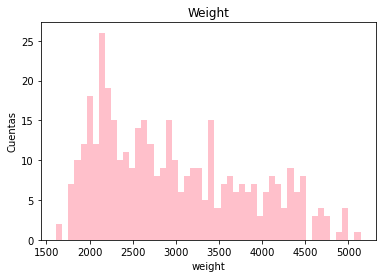

In [4]:
atr3 = 'weight'
valores = df[atr3].values        
num_bins = 50                                
n, bins, patches = plt.hist(valores, num_bins, density=False, facecolor='pink')
plt.xlabel(atr3)        
plt.ylabel('Cuentas')                     
plt.title('Weight')                     
plt.grid(False)                              
plt.show() 

- El histograma no es simétrico
- La mayor contración de valores se encuentra entre 1900 y 2200

In [ ]:
#Vamos a generar otro gráfico exploratorio muy común, pero esta vez vamos a utilizar la librería altair.

import altair as alt   #Altair: Declarative Visualization in Python. https://altair-viz.github.io

alt.Chart(df).mark_point().encode(
  x='horsepower',
  y='mpg',
  color='cylinders'
).interactive()

alt.Chart(...)

### Graficos de correlación

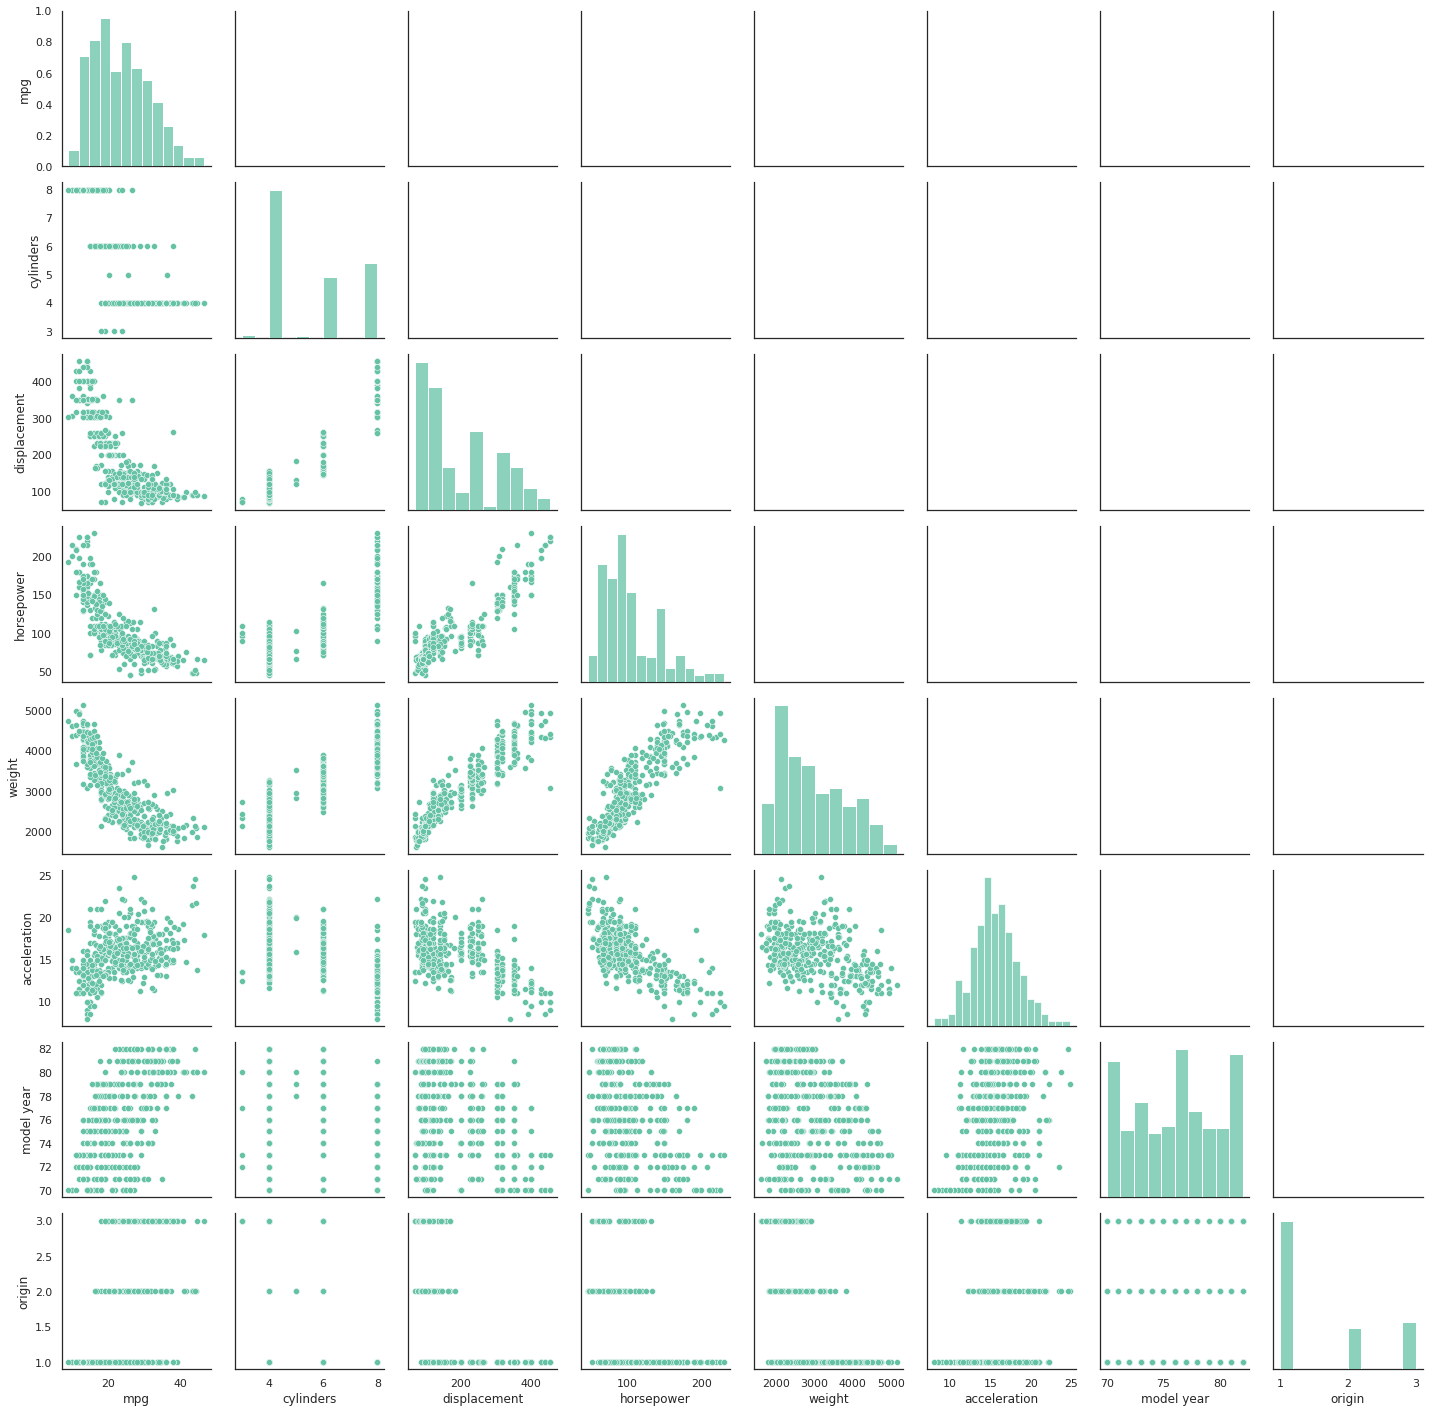

In [ ]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df,diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()

#### **Pregunta 2.5**
Analice la gráfica anterior e indique si existe una relación evidente y de qué tipo entre el parámetro 'target' ('mpg') y los atributos del dataset.


Respuesta Pregunta 2.5
El parametro 'mpg' tiene una relación inversamente proporcional con las variables 'weight', 'horsepower' y 'displacement'. Por lo que, una vez que aumenta el target, las otras variables disminuyen.

#### **Pregunta 2.6**
Construya la matriz de correlación e indique cuáles son los atributos que tienen mayor correlación con la variable 'target' ('mpg').


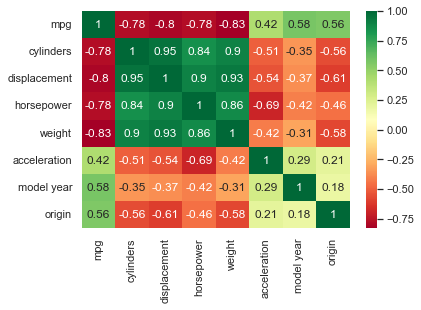

In [17]:
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

#Respuesta Pregunta 2.6
Los atributos que tienen mayor correlación con la variable 'mpg' son 'model year' con un nivel de correlación de 0.58 y 'origin' con un nivel de correlación de 0.56

### Box Plot

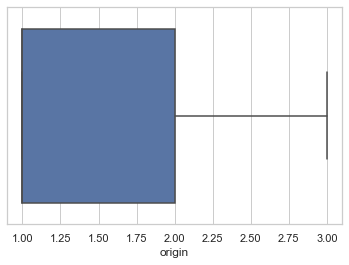

In [13]:
atr8 = 'origin'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[atr8])

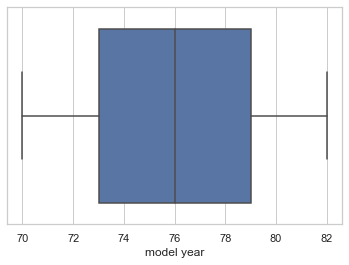

In [14]:
atr7 = 'model year'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[atr7])

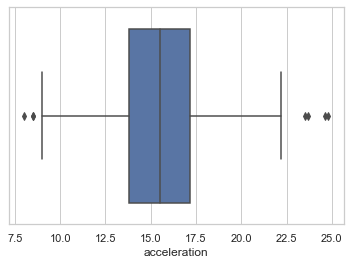

In [12]:
atr6 = 'acceleration'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[atr6])

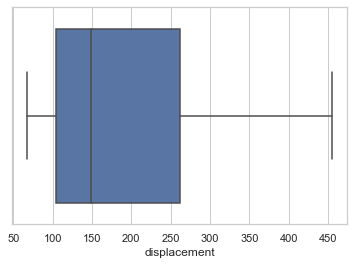

In [11]:
atr5 = 'displacement'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[atr5])

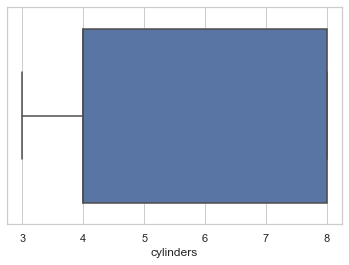

In [10]:
atr4 = 'cylinders'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[atr4])

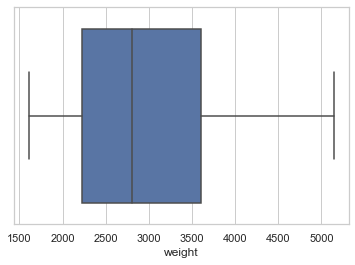

In [9]:
atr3 = 'weight'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[atr3])

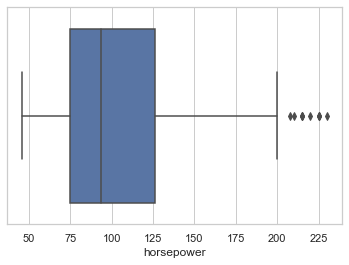

In [8]:
atr2 = 'horsepower'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[atr2])

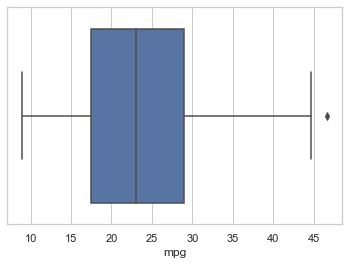

In [7]:
atr = 'mpg'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[atr])


#### **Pregunta 2.7**
Indique para qué atributos existen outliers.


Respuesta Pregunta 2.7
Existen outliers para los atributos 'acceleration', 'horsepower' y 'mpg' que se evidencia claramente en el diagrama de cajas y bigotes.


## Limpieza Básica.

### Valores Nulos


In [29]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# **EJERCICIOS PROPUESTOS TALLER 2.**

#**Ejercicio 1**

* a. Consulte qué representa cada uno de los atributos del dataset y en qué unidades están dados.
* b. Indique cuáles atributos toman valores discretos y cuáles atributos toman valores continuos.








mpg = millas por galon - continua

cylinders = el cilindraje del auto -discreta

displacement = aire desplazado por los cilindros -continua

horsepower = caballos de fuerza del auto -discreta

weight = peso - continua

acceleration = aceleracion maxima del auto - continua

model year = año del modelo -discreta

origin = VIN number - discreta

car name = nombre de la marca del auto - discreta

#**Ejercicio 2**

Haga una copia del dataframe df y llamelo df_mod y en este nuevo dataframe convierta los datos de la columna mpg (millas por galón) a kpg (kilómetros por galón) y renombre la columna como kpg

In [8]:
df_mod = df

def millasAkilometros(n):
  float(n)
  return n*1.60934

df_mod.rename(columns  ={'mpg':'kpg'}, inplace = True)
df_mod['kpg'] = df_mod['kpg'].map(millasAkilometros)
df_mod

,kpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,28.96812,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,24.14010,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,28.96812,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,25.74944,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,27.35878,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,43.45218,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,70.81096,4,97.0,52,2130,24.6,82,2,vw pickup
395,51.49888,4,135.0,84,2295,11.6,82,1,dodge rampage
396,45.06152,4,120.0,79,2625,18.6,82,1,ford ranger


#**Ejercicio 3**

*   a. Identifique si hay valores faltantes y en cuál o cuáles atributos.
*   b. Sobre df_mod aplique alguna técnica para el manejo de valores faltantes y justifique por qué la utilizó.

In [31]:
df_mod.isnull().sum()

kpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

#**Ejercicio 4** 

Use el dataframe df_mod y para cada atributo obtenga:

* a. Mediana.
* b. Q1, Q3, IQR (Interquartile Range)
* c. El número y el porcentaje de outliers.

In [32]:
print(df_mod.mean())
q1 = df_mod.quantile([0.25])
q3 = df_mod.quantile([0.75])
print(df_mod.quantile([0.25,0.50,0.75]))
print(df_mod.quantile([1]))
print(q3-q1)

kpg               37.842943
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64
           kpg  cylinders  displacement   weight  acceleration  model year  \
0.25  28.16345        4.0        104.25  2223.75        13.825        73.0   
0.50  37.01482        4.0        148.50  2803.50        15.500        76.0   
0.75  46.67086        8.0        262.00  3608.00        17.175        79.0   

      origin  
0.25     1.0  
0.50     1.0  
0.75     2.0  
           kpg  cylinders  displacement  weight  acceleration  model year  \
1.0  74.995244        8.0         455.0  5140.0          24.8        82.0   

     origin  
1.0     3.0  
      kpg  cylinders  displacement  weight  acceleration  model year  origin
0.25  NaN        NaN           NaN     NaN           NaN         NaN     NaN
0.75  NaN        NaN           NaN     NaN           NaN         NaN     NaN


/var/folders/m1/y83lzzrj3g9cwk3vm5gds84r0000gn/T/ipykernel_16123/3361674399.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_mod.mean())


#**Ejercicio 5** 

Sugiera una estrategia para el manejo de los outliers y justifique.

Para los outliers, las mejores estratedias son utilizando la media y varios tipos de calculo de mediana.

Diferentes casos:

- Calculo de la mediana incluyendo lo valores atipicos si consideramos que estos valores no fueron digitados erroneamente. 
- Calculo de la mediana omitiendo los valores atipico, esto nos ayudara a llevar un manejo cuando necesitemos un tipo de analisis en el cual los valores atipicos nos generen ruido a nuestros resultados.
- Reemplazo de los valores atipicos por valores que se encuentren detro del rango de 1.5 en los cuartiles (la mediana winsorizada).

#**Ejercicio 6**

Construya el histograma de dos atributos que le parezcan interesantes (diferentes a 'horsepower' y 'weight') e indique que información le aportan y como se comporta la variable 'target' con respecto a ellos.

Text(0.5, 1.0, 'Histograma')

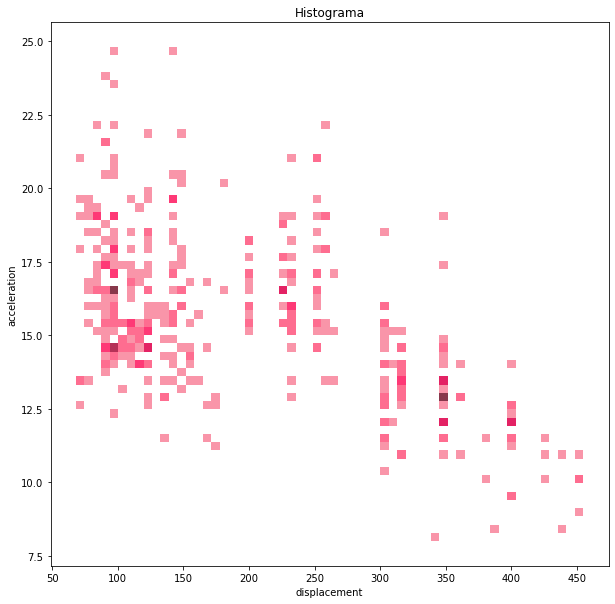

In [34]:
plt.figure(figsize=(10,10))
sns.histplot(data     = df_mod, 
             x        = "displacement",
             y        = "acceleration",
             bins     =  60,
             color    = 'pink',
             fill     = True,
             stat     = 'count')    
                                                       

plt.xlabel("displacement") 
plt.ylabel('acceleration')              
plt.title('Histograma')  

#**Ejercicio 7**

'Juegue' con el dataset y genere al menos dos preguntas cuya respuesta pueda mostrar de manera gráfica, por ejemplo: cómo se comporta el consumo de acuerdo a la marca de los autos?

Text(0.5, 1.0, 'Histograma')

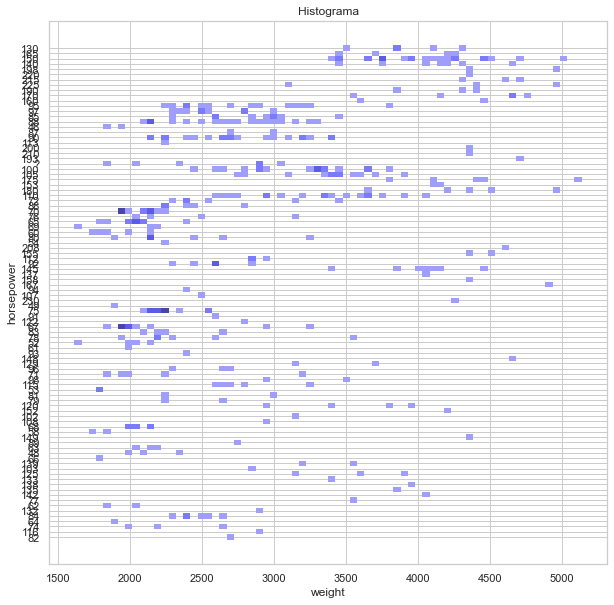

In [44]:
plt.figure(figsize=(10,10))
sns.histplot(data     = df_mod, 
             x        = "weight",
             y        = "horsepower",
             bins     =  70,
             color    = 'blue',
             fill     = False,
             stat     = 'count')    
                                       

plt.xlabel("weight") 
plt.ylabel('horsepower')              
plt.title('Histograma')  

El consumo del vehiculo se comporta con respecto al modelo del mismo de la misma forma:

In [ ]:
atr = 'model year'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[atr])

#**Ejercicio 8**

Genere otro gráfico que pueda ser útil para entender mejor el conjunto de datos que usamos en este taller. Puede usar los siguientes recursos:**

Pandas: https://pandas.pydata.org/docs/user_guide/visualization.html

Matplotlib: https://matplotlib.org/3.1.1/gallery/index.html 

Seaborn: https://seaborn.pydata.org/examples/index.html 

Altair: https://altair-viz.github.io

In [11]:
import altair as alt   

alt.Chart(df_mod).mark_point().encode(
  x='weight',
  y='displacement',
  color='cylinders'
).interactive()

alt.Chart(...)

# **FIN**

#**Metodología**

1. Lleve a cabo los ejercicios del Taller 2 en grupos de máximo 2 personas.

2. Después de la sesión de Taller 2, suba a Intu el archivo con la solución de las preguntas con nombre en el siguiente formato:

Taller_2_Apellido-Nombre_Apellido-Nombre.ipynb

3. Resuelva los Ejercicios Propuestos en un nuevo notebook de Jupyter y suba el archivo a Intu hasta el próximo lunes 05 de septiembre a las 7:00 am (antes del inicio de la clase). Utilice el siguiente formato para el nombre del archivo.

Ejercicios_Taller_2_Apellido-Nombre_Apellido-Nombre.ipynb

4.	Recuerde consignar los nombres de los integrantes dentro del notebook.

5.	Algunos grupos serán llamados al azar durante la clase del lunes 05 de septiembre para realizar la presentación de alguno (s) de los puntos.

6. La nota del Taller 2 se asignará así:

- Preguntas Taller 2 (20%)

- Ejercicios Taller 2 (80%)
